In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [149]:
df = pd.read_csv('COMP40370 Practical 1diabetes.csv')  # Replace 'your_data.csv' with the actual path to your data file

In [150]:
df = df.dropna().copy()
df.shape

(765, 9)

In [158]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,3.818342,118.851852,71.640212,20.991182,77.059965,31.827160,0.455686,32.604938,0.319224
std,3.201228,27.882374,8.863173,14.836861,94.513726,6.109846,0.281585,10.997230,0.466588
min,0.000000,57.000000,54.000000,0.000000,0.000000,18.200000,0.092000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.249000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,24.000000,49.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,137.000000,78.000000,32.000000,130.000000,35.800000,0.600000,40.000000,1.000000
max,13.000000,195.000000,88.000000,50.000000,480.000000,46.700000,1.441000,66.000000,1.000000


## how to plot for multiple columns

In [159]:
df = df[df['Pregnancies'] <= df['Pregnancies'].quantile(0.99)]
df = df[(df['SkinThickness'] <= df['SkinThickness'].quantile(0.99)) & (df['SkinThickness'] >= df['SkinThickness'].quantile(0.01))]
df = df[(df['BloodPressure'] <= df['BloodPressure'].quantile(0.9)) & (df['BloodPressure'] >= df['BloodPressure'].quantile(0.1))]
df = df[(df['Glucose'] <= df['Glucose'].quantile(0.99)) & (df['Glucose'] >= df['Glucose'].quantile(0.01))]
df = df[(df['Insulin'] <= df['Insulin'].quantile(0.99)) & (df['Insulin'] >= df['Insulin'].quantile(0.01))]
df = df[(df['BMI'] <= df['BMI'].quantile(0.99)) & (df['BMI'] >= df['BMI'].quantile(0.01))]
df = df[(df['DiabetesPedigreeFunction'] <= df['DiabetesPedigreeFunction'].quantile(0.98)) & (df['DiabetesPedigreeFunction'] >= df['DiabetesPedigreeFunction'].quantile(0.01))]
df = df[(df['Age'] <= df['Age'].quantile(0.99)) & (df['Age'] >= df['Age'].quantile(0.01))]

In [152]:
df.shape

(567, 9)

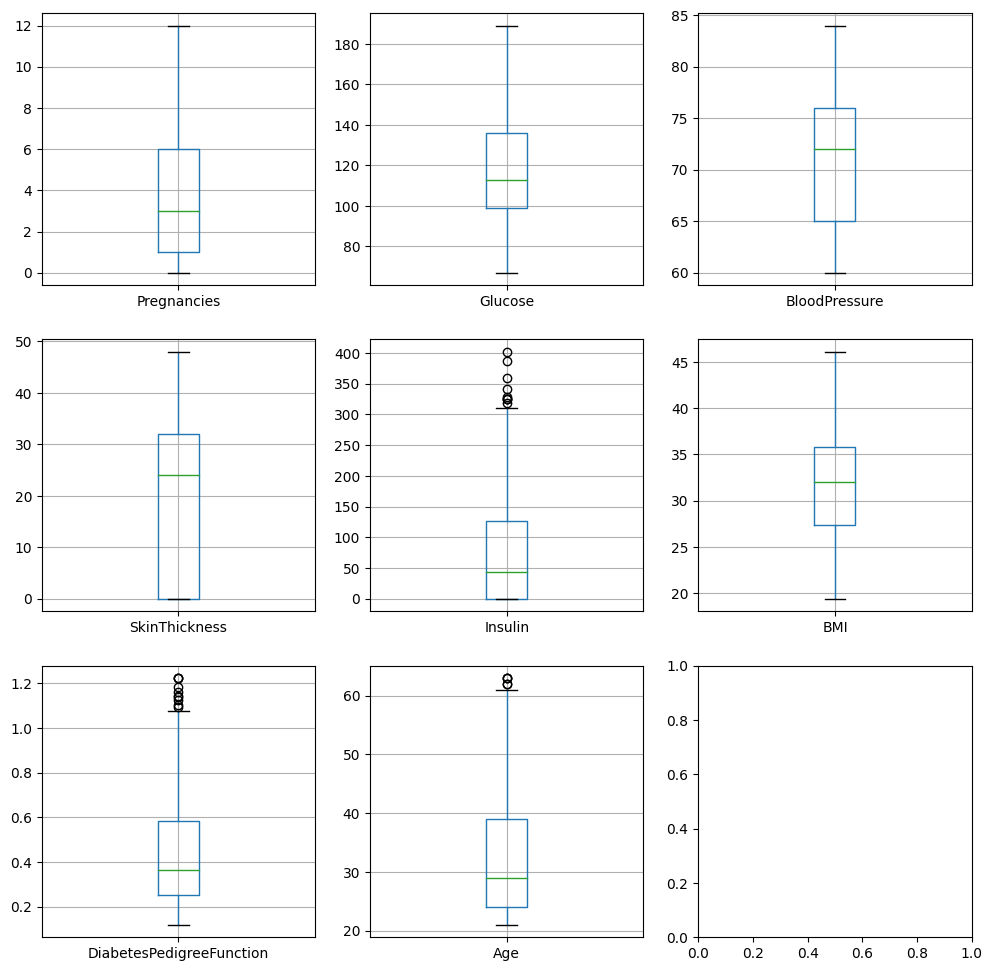

In [160]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize = (12,12))

ax = ax.flatten()

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, column in enumerate(cols):
    axes = ax[i]
    df.boxplot(column = column, ax = axes)

plt.show()

In [154]:
Y = df['Outcome']  # Replace 'DependentVariable' with the actual name of your dependent variable column
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Replace 'IndependentVariable1' and 'IndependentVariable2' with the actual names of your independent variable columns

In [155]:
x = sm.add_constant(X)    # use (X_imputed) for specific column

In [156]:
model = sm.OLS(Y, x)
results = model.fit()

In [157]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           2.03e-37
Time:                        14:46:27   Log-Likelihood:                -274.33
No. Observations:                 567   AIC:                             566.7
Df Residuals:                     558   BIC:                             605.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   